# Importing the necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
# Get the base directory of the project
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Construct the correct path to the dataset
file_path = os.path.join(base_dir, 'dataset', 'iphone.csv')

# Basic analysis


In [3]:
print("Dataset information:")
df = pd.read_csv(file_path)
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   productAsin                3062 non-null   object
 1   country                    3062 non-null   object
 2   date                       3062 non-null   object
 3   isVerified                 3062 non-null   bool  
 4   ratingScore                3062 non-null   int64 
 5   reviewTitle                3062 non-null   object
 6   reviewDescription          2976 non-null   object
 7   reviewUrl                  3046 non-null   object
 8   reviewedIn                 3062 non-null   object
 9   variant                    3062 non-null   object
 10  variantAsin                3062 non-null   object
 11  cleaned_reviewDescription  2958 non-null   object
dtypes: bool(1), int64(1), object(10)
memory usage: 266.3+ KB


In [4]:
# Display the first 5 rows of the dataset
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,cleaned_reviewDescription
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,every thing good iphones nothing compared spee...
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,look fabulous android user switched apple perf...
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,tried flip camera recording facility added pau...
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,100 genuine
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,happy get iphone 13 amazon offer


In [5]:
# Display the number of unique values for each column
df.nunique()

productAsin                     7
country                         7
date                          789
isVerified                      2
ratingScore                     5
reviewTitle                  2018
reviewDescription            2297
reviewUrl                    2460
reviewedIn                   1255
variant                        86
variantAsin                    99
cleaned_reviewDescription    2224
dtype: int64

In [6]:
# Display the number of missing values for each column
df.isnull().sum()


productAsin                    0
country                        0
date                           0
isVerified                     0
ratingScore                    0
reviewTitle                    0
reviewDescription             86
reviewUrl                     16
reviewedIn                     0
variant                        0
variantAsin                    0
cleaned_reviewDescription    104
dtype: int64

In [7]:
print("Statistical information:")
df.describe()


Statistical information:


,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


# Detailed Data Analysis


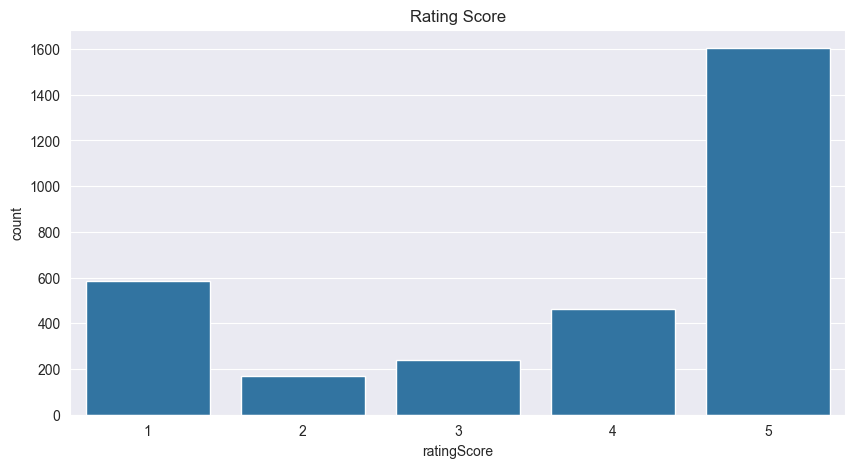

In [8]:
# using matplotlib for visualization

# visualise the field ratingScore
# visualise each score with different color

plt.figure(figsize=(10,5))
sns.countplot(x='ratingScore', data=df)
plt.title('Rating Score')
plt.show()


In [9]:
# checking amount of data available for each country

data_per_country = df.groupby('country').size()
print(data_per_country)

country
Canada                     4
Egypt                      1
India                   2229
Japan                    158
Mexico                    11
United Arab Emirates      80
United States            579
dtype: int64


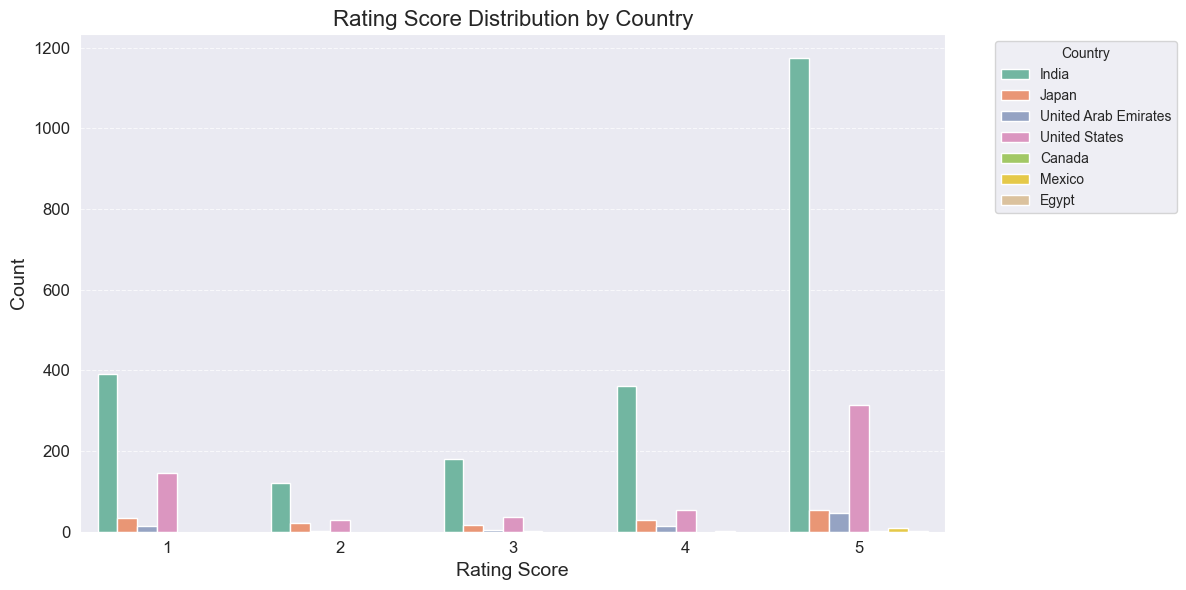

In [10]:
# visualise the distribution of ratingScore for each country

plt.figure(figsize=(12, 6))
sns.countplot(x='ratingScore', hue='country', data=df, palette='Set2')
plt.title('Rating Score Distribution by Country', fontsize=16)
plt.xlabel('Rating Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Data Preprocessing and cleaning


In [11]:
# importing the necessary libraries to clean the text data
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download
#from textblob import TextBlob
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Download necessary NLTK resources
download('punkt')  # Tokenizer
download('stopwords')  # Stopwords
download('wordnet')  # Lemmatizer


# cleaning the text for reviewdescription
# Fill missing descriptions with empty strings
df['reviewDescription'] = df['reviewDescription'].fillna("")

# Remove special characters, numbers, and emojis
def clean_text(text):
    # convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters, numbers, and punctuation
    #text = re.sub(r'[^a-z\s]', '', text)
    # change it because it is not removing the numbers and it is important for our data
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    # Remove emojis
    text = emoji.replace_emoji(text, replace="")
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

#function for correcting the spelling mistakes
#def correct_spelling(text):
 #   return str(TextBlob(text).correct())
 # comment out the above function as it takes a lot of time to run!
#we realised that the spelling mistakes are not that much in the data so we can ignore this function


# Apply the cleaning function to the reviewDescription column
df['cleaned_reviewDescription'] = df['reviewDescription'].apply(clean_text)
#df['corrected_reviewDescription'] = df['cleaned_reviewDescription'].apply(correct_spelling)


# Save the cleaned dataset for further processing
cleaned_file_path = os.path.join(base_dir, 'dataset', 'iphone.csv')
df.to_csv(cleaned_file_path, index=False)

print("Data cleaning completed. Cleaned data saved to:", cleaned_file_path)

# Example of before and after cleaning
print("Original Description:", df['reviewDescription'][0])
print("Cleaned Description:", df['cleaned_reviewDescription'][0])
#print("Corrected Description:", df['corrected_reviewDescription'][0])


# Tokenization and Text Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_reviewDescription'])
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
# Get the feature names (the words corresponding to the columns of the TF-IDF matrix)
features = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array and take the mean of each feature
mean_tfidf = tfidf_matrix.mean(axis=0).A1

# Combine the words with their mean TF-IDF scores
word_scores = zip(features, mean_tfidf)
sorted_words = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Print top 10 words with highest mean TF-IDF score
for word, score in sorted_words[:10]:
    print(f"{word}: {score}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jibin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jibin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jibin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data cleaning completed. Cleaned data saved to: C:\Users\jibin\PycharmProjects\SentimentAnalysis_CustomerReviews\dataset\iphone.csv
Original Description: Every thing is good about iPhones, there's nothing compared to it's speed and ios but i was disappointed because there's no charger for it even though Indian judiciary told them to provide , still they haven't made any progress regarding charger. Why should we spend 62k and more than that for iPhones because of it's brand and Acessories comfort size and Features right if that's not there what's point of buying an iPhone.Thank you🙏
Cleaned Description: every thing good iphones nothing compared speed io disappointed charger even though indian judiciary told provide still made progress regarding charger spend 62k iphones brand acessories comfort size feature right point buying iphone thank
TF-IDF Matrix Shape: (3062, 5000)
good: 0.06474975792349226
phone: 0.05241626095974412
product: 0.03810820719382741
iphone: 0.0329053351326489
battery

# Word Cloud


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

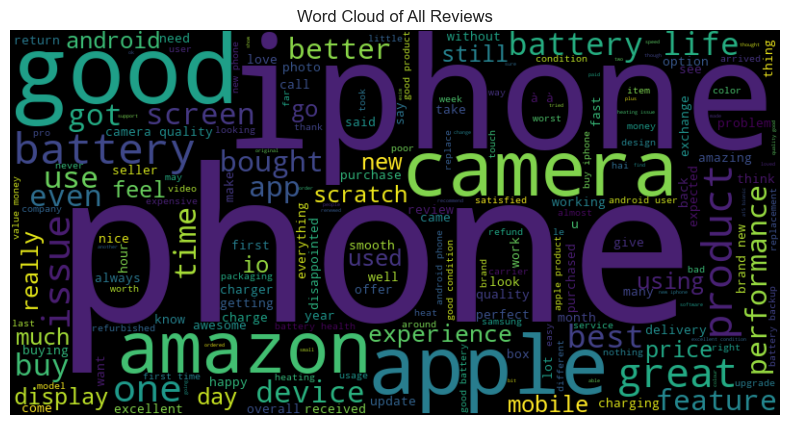

In [13]:
# Generate Word Cloud for all reviews
all_text = ' '.join(review for review in df['cleaned_reviewDescription'])
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

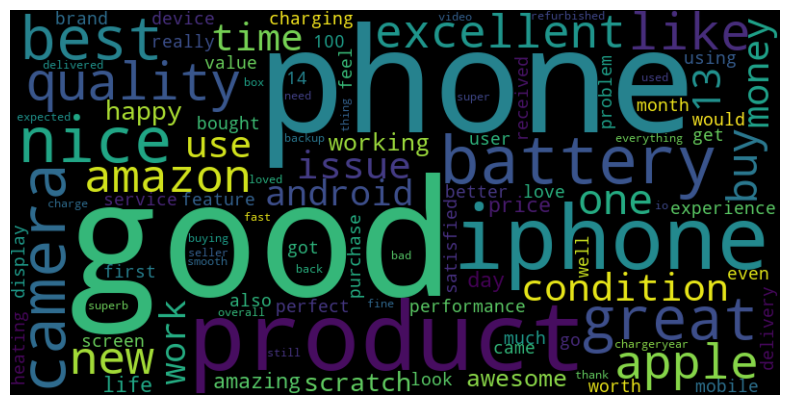

In [14]:
# Create a word cloud from the top words
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words[:100]))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()